<a href="https://colab.research.google.com/github/michaeljmcardoso/Horas-do-Mundo/blob/main/Gr%C3%A1fico_FusoHor%C3%A1rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
!pip install matplotlib pytz -q

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import pytz


In [53]:
# Lista com os fusos horários desejados
fusos_horarios = ['America/Sao_Paulo', 'America/New_York', 'Europe/London', 'America/Lima', 'Australia/Sydney', 'Europe/Paris', 'Asia/Tokyo']


In [54]:
# Obtém a hora atual para cada fuso horário
horas = []
for fuso_horario in fusos_horarios:
    # Cria um objeto de fuso horário com base na string do fuso horário
    tz = pytz.timezone(fuso_horario)
    # Obtém a hora atual no fuso horário especificado
    hora_atual = datetime.now(tz).time()
    # Adiciona a hora atual à lista de horas
    horas.append(hora_atual)

In [55]:
# Cria uma lista com os nomes dos fusos horários
nomes_fusos = [tz.split('/')[1].replace('_', ' ') for tz in fusos_horarios]

# A linha acima faz o seguinte:
# - Para cada string de fuso horário em fusos_horarios, realizamos as seguintes etapas:
# - Usamos o método split('/') para dividir a string do fuso horário em duas partes, por exemplo, 'America/Sao_Paulo' se torna ['America', 'Sao_Paulo']
# - Selecionamos a segunda parte, que é o nome do fuso horário, usando [1]
# - Usamos o método replace('_', ' ') para substituir os underscores (_) por espaços em branco, por exemplo, 'Sao_Paulo' se torna 'Sao Paulo'
# - O resultado final é adicionado à lista nomes_fusos


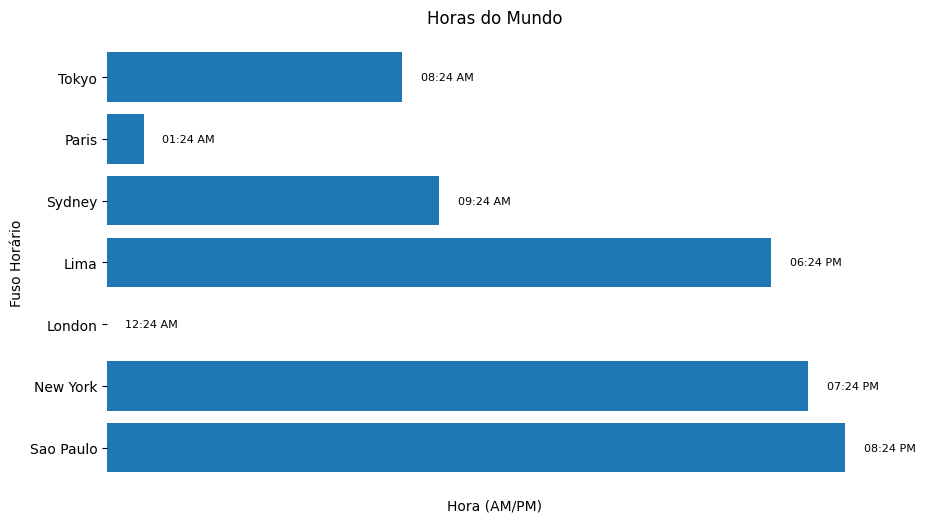

In [79]:
# Plota o gráfico
fig, ax = plt.subplots(figsize=(10, 6))
barras = plt.barh(nomes_fusos, [hora.hour for hora in horas])

# Adiciona os valores dos fusos horários (AM/PM) ao lado das barras
for barra, hora in zip(barras, horas):
    hora_am_pm = hora.strftime('%I:%M %p')  # Formato AM/PM
    plt.text(barra.get_width() + 0.5, barra.get_y() + barra.get_height() / 2, hora_am_pm,
             ha='left', va='center', color='black', fontsize='8')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tick_params(axis='both',
                which='both',
                bottom=False,
                top=False,
                labelbottom=False)

# Configurações do gráfico
plt.title('Horas do Mundo')
plt.xlabel('Hora (AM/PM)')
plt.ylabel('Fuso Horário')

# Exibe o gráfico
plt.show()